   0  0.1
0  1    1
1  2    1
2  3    0
3  4    0
4  5    0


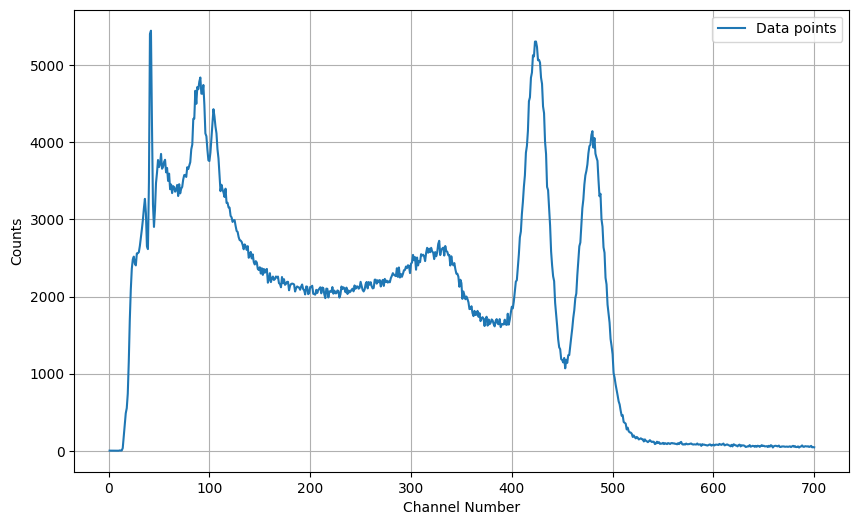

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Excel file
file_path = 'Exp4_cobalt_data(2).xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, engine='openpyxl')

# Step 2: Check the first few rows of the data to understand its structure
print(df.head())

x = df.iloc[:, 0]  # First column
y = df.iloc[:, 1]  # Second column

# Step 4: Plot the data
x_min = 0  # Minimum x value
x_max = 700  # Maximum x value

# Step 5: Filter the data based on the defined range
mask = (x >= x_min) & (x <= x_max)  # Create a mask for the range
x_filtered = x[mask]
y_filtered = y[mask]

# Step 6: Plot the filtered data
plt.figure(figsize=(10, 6))
plt.plot(x_filtered, y_filtered, label=f'Data points')
plt.xlabel("Channel Number")
plt.ylabel("Counts")


# Step 6: Display the plot
plt.legend()
plt.grid(True)
plt.show()


In [2]:
def double_gaussian(x, amp1, mean1, sigma1, amp2, mean2, sigma2, a, b, c):
    gaussian1 = amp1 * np.exp(-((x - mean1) ** 2) / (2 * sigma1 ** 2))
    gaussian2 = amp2 * np.exp(-((x - mean2) ** 2) / (2 * sigma2 ** 2))
    background = a * x**2 + b * x + c
    return gaussian1 + gaussian2 + background

   0  0.1
0  1    1
1  2    1
2  3    0
3  4    0
4  5    0


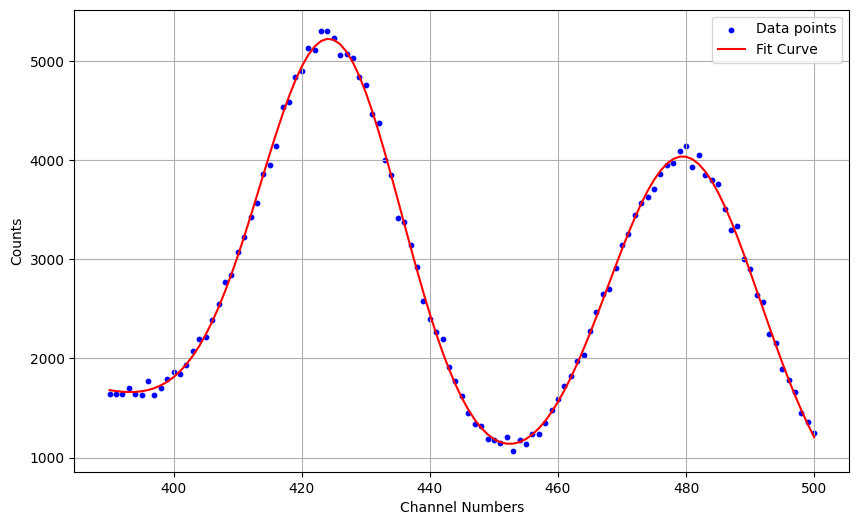

Fitted Parameters for x=390 to x=500: [ 4.17755476e+03  4.24618126e+02  1.10960732e+01  3.58369545e+03
  4.79731195e+02  1.19705681e+01  7.44160392e-02 -7.80194500e+01
  2.07574133e+04]
FWHM of the first Gaussian: 26.13125227590456
FWHM of the second Gaussian: 28.190687815483646
Centroid of the first peak: 424.6181261312767
Centroid of the second peak: 479.7311951451375


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Step 1: Load the Excel file
file_path = 'Exp4_cobalt_data(2).xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, engine='openpyxl')

# Step 2: Check the first few rows of the data to understand its structure
print(df.head())

# Assuming the first column is x and the second column is y (adjust if needed)
x = df.iloc[:, 0]  # First column as x
y = df.iloc[:, 1]  # Second column as y

# Step 3: Define custom x-ranges (adjust as per your data)
x_ranges = [(390, 500)]  # This can be extended for multiple plots as needed

# Loop through different x ranges (assuming you're using a loop to plot multiple ranges)
for i, (x_min, x_max) in enumerate(x_ranges):
    mask = (x >= x_min) & (x <= x_max)  # Create a mask for x values in the specified range
    x_filtered = x[mask]
    y_filtered = y[mask]

    # Initial guess for the parameters [A1, mu1, sigma1, A2, mu2, sigma2, a, b, c]
    A1_init = np.max(y_filtered)  # Amplitude for the first Gaussian
    A2_init = np.max(y_filtered) / 4  # Amplitude for the second Gaussian (set to 1/4 of A1)
    mu1_init = np.mean(x_filtered) - (np.std(x_filtered) / 2)  # Mean for the first Gaussian
    mu2_init = np.mean(x_filtered) + (np.std(x_filtered) / 2)  # Mean for the second Gaussian
    sigma_init = 10  # Standard deviation (width) for both Gaussians (can be adjusted)

    # Set the initial guess for the parameters: [A1, mu1, sigma1, A2, mu2, sigma2, a, b, c]
    initial_guess = [A1_init, mu1_init, sigma_init, A2_init, mu2_init, sigma_init, 0, 0, 0]

    # Step 4: Define the double Gaussian function with a quadratic background
    def double_gaussian_quadratic(x, amp1, mean1, sigma1, amp2, mean2, sigma2, a, b, c):
        gaussian1 = amp1 * np.exp(-((x - mean1) ** 2) / (2 * sigma1 ** 2))  # First Gaussian
        gaussian2 = amp2 * np.exp(-((x - mean2) ** 2) / (2 * sigma2 ** 2))  # Second Gaussian
        background = a * x**2 + b * x + c  # Quadratic background
        return gaussian1 + gaussian2 + background

  
    try:
        params, covariance = curve_fit(double_gaussian_quadratic, x_filtered, y_filtered, p0=initial_guess)

        
        y_fit = double_gaussian_quadratic(x_filtered, *params)

        # Step 7: Plot the original data and the fitted curve
        plt.figure(figsize=(10, 6))
        plt.scatter(x_filtered, y_filtered, s=10, color='blue', label='Data points', marker='o')
        plt.plot(x_filtered, y_fit, label='Fit Curve', color='red')

        # Step 8: Add labels and title
        plt.xlabel('Channel Numbers')
        plt.ylabel('Counts')
        #plt.title(f'Double Gaussian + Quadratic Fit (x={x_min} to x={x_max}')

        # Step 9: Display the plot
        plt.legend()
        plt.grid(True)
        plt.show()

        # Step 10: Print the fitted parameters
        print(f"Fitted Parameters for x={x_min} to x={x_max}: {params}")

        # Calculate Full Width at Half Maximum (FWHM) for the Gaussians
        def calculate_fwhm(sigma):
            return 2.355 * sigma  # Full width at half maximum (FWHM) for Gaussian

        # Calculate FWHM for both peaks
        fwhm1 = calculate_fwhm(params[2])  # FWHM for the first Gaussian
        fwhm2 = calculate_fwhm(params[5])  # FWHM for the second Gaussian

        print(f"FWHM of the first Gaussian: {fwhm1}")
        print(f"FWHM of the second Gaussian: {fwhm2}")

        # Step 11: Calculate the centroid (mean) of each peak
        centroid1 = params[1]  # Centroid for the first peak (mean1)
        centroid2 = params[4]  # Centroid for the second peak (mean2)

        print(f"Centroid of the first peak: {centroid1}")
        print(f"Centroid of the second peak: {centroid2}")

    except RuntimeError:
        print(f"Warning: Fit failed for x={x_min} to x={x_max}")


   0  0.1
0  1    2
1  2    1
2  3    1
3  4    0
4  5    0


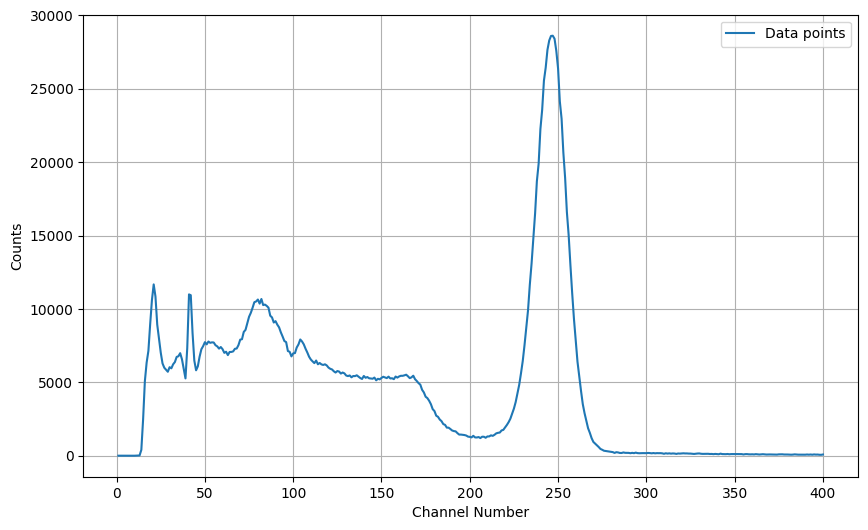

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Excel file
file_path = 'Cs_data.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, engine='openpyxl')

# Step 2: Check the first few rows of the data to understand its structure
print(df.head())

# Step 3: Extract the x and y columns
x = df.iloc[:, 0]  # First column
y = df.iloc[:, 1]  # Second column

# Step 4: Define the range for x values you want to plot
x_min = 0  # Minimum x value
x_max = 400  # Maximum x value

# Step 5: Filter the data based on the defined range
mask = (x >= x_min) & (x <= x_max)  # Create a mask for the range
x_filtered = x[mask]
y_filtered = y[mask]

# Step 6: Plot the filtered data
plt.figure(figsize=(10, 6))
plt.plot(x_filtered, y_filtered, label=f'Data points')

# Step 7: Add labels and title to the plot
plt.xlabel('Channel Number')  # Customize as needed
plt.ylabel('Counts')  # Customize as needed
#plt.title('Plot of Data from Excel (Filtered Range)')

# Step 8: Display the plot
plt.legend()
plt.grid(True)
plt.show()


   0  0.1
0  1    2
1  2    1
2  3    1
3  4    0
4  5    0


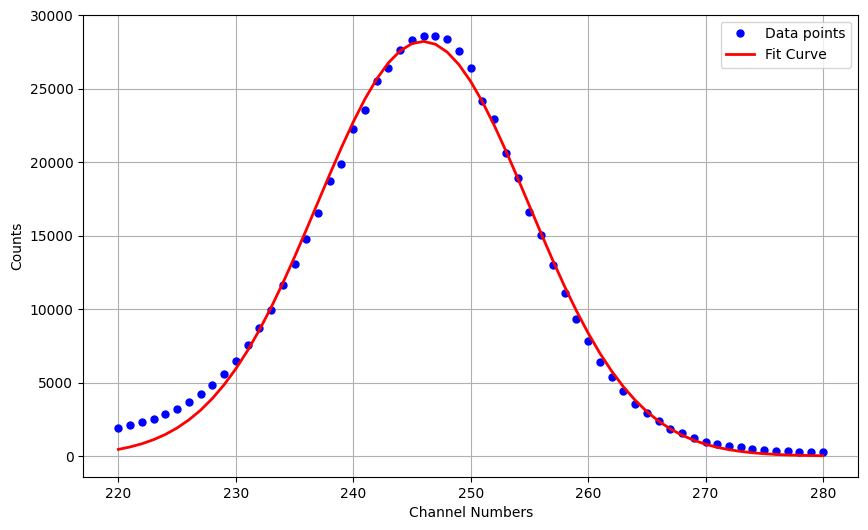

Fitted Parameters:
Amplitude: 28223.588235317617
Mean: 245.93622283769966
Sigma: 9.023983727153514


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Step 1: Load the Excel file
file_path = 'Cs_data.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, engine='openpyxl')

# Step 2: Check the first few rows of the data to understand its structure
print(df.head())

# Assuming the first column is x and the second column is y (adjust if needed)
x = df.iloc[:, 0]  # First column as x
y = df.iloc[:, 1]  # Second column as y

# Step 3: Filter the data for x values between 200 and 260
mask = (x >= 220) & (x <= 280)
x_filtered = x[mask]
y_filtered = y[mask]

# Step 4: Define the Gaussian function
def gaussian(x, amp, mean, sigma):
    """
    Gaussian function:
    amp = amplitude (height of the peak)
    mean = mean (position of the center of the peak)
    sigma = standard deviation (width of the peak)
    """
    return amp * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Step 5: Initial guess for the Gaussian parameters: [amp, mean, sigma]
initial_guess = [max(y_filtered), np.mean(x_filtered), 5]  # Adjust the initial guess if needed

# Step 6: Fit the data to the Gaussian model
params, covariance = curve_fit(gaussian, x_filtered, y_filtered, p0=initial_guess)

# Step 7: Generate fitted data using the fitted parameters
y_fit = gaussian(x_filtered, *params)

# Step 8: Plot the original data and the fitted Gaussian curve
plt.figure(figsize=(10, 6))
plt.plot(x_filtered, y_filtered, 'bo', label='Data points', markersize=5)  # Data points as blue circles
plt.plot(x_filtered, y_fit, 'r-', label='Fit Curve', linewidth=2)  # Fitted Gaussian as red line

# Step 9: Add labels and title to the plot
plt.xlabel('Channel Numbers')
plt.ylabel('Counts')
#plt.title('Gaussian Fit to Data (x=200 to x=260)')

# Step 10: Display the plot
plt.legend()
plt.grid(True)
plt.show()

# Step 11: Print the fitted parameters
print("Fitted Parameters:")
print(f"Amplitude: {params[0]}")
print(f"Mean: {params[1]}")
print(f"Sigma: {params[2]}")


Plot 1:
  FWHM for peak 1 (mu1=236.24290588926047, sigma1=6.198503432186684): 14.60
  FWHM for peak 2 (mu2=266.74234275772153, sigma2=6.902572520708389): 16.25
Plot 2:
  FWHM for peak 1 (mu1=236.24290588926047, sigma1=6.198503432186684): 14.60
  FWHM for peak 2 (mu2=266.74234275772153, sigma2=6.902572520708389): 16.25
Plot 3:
  FWHM for peak 1 (mu1=267.1028138390804, sigma1=7.048162748443703): 16.60
  FWHM for peak 2 (mu2=301.76199845846463, sigma2=7.757696971899532): 18.27
Plot 4:
  FWHM for peak 1 (mu1=309.90954589237964, sigma1=8.099852992739807): 19.07
  FWHM for peak 2 (mu2=350.17333159924766, sigma2=8.916115745238686): 21.00
Plot 5:
  FWHM for peak 1 (mu1=350.96639691669475, sigma1=9.174716628740505): 21.60
  FWHM for peak 2 (mu2=396.4480133858191, sigma2=10.079682719969679): 23.74
Plot 6:
  FWHM for peak 1 (mu1=399.6832204895382, sigma1=10.524690370431689): 24.78
  FWHM for peak 2 (mu2=451.2125960657737, sigma2=11.67933956316017): 27.50
Plot 7:
  FWHM for peak 1 (mu1=453.2224436

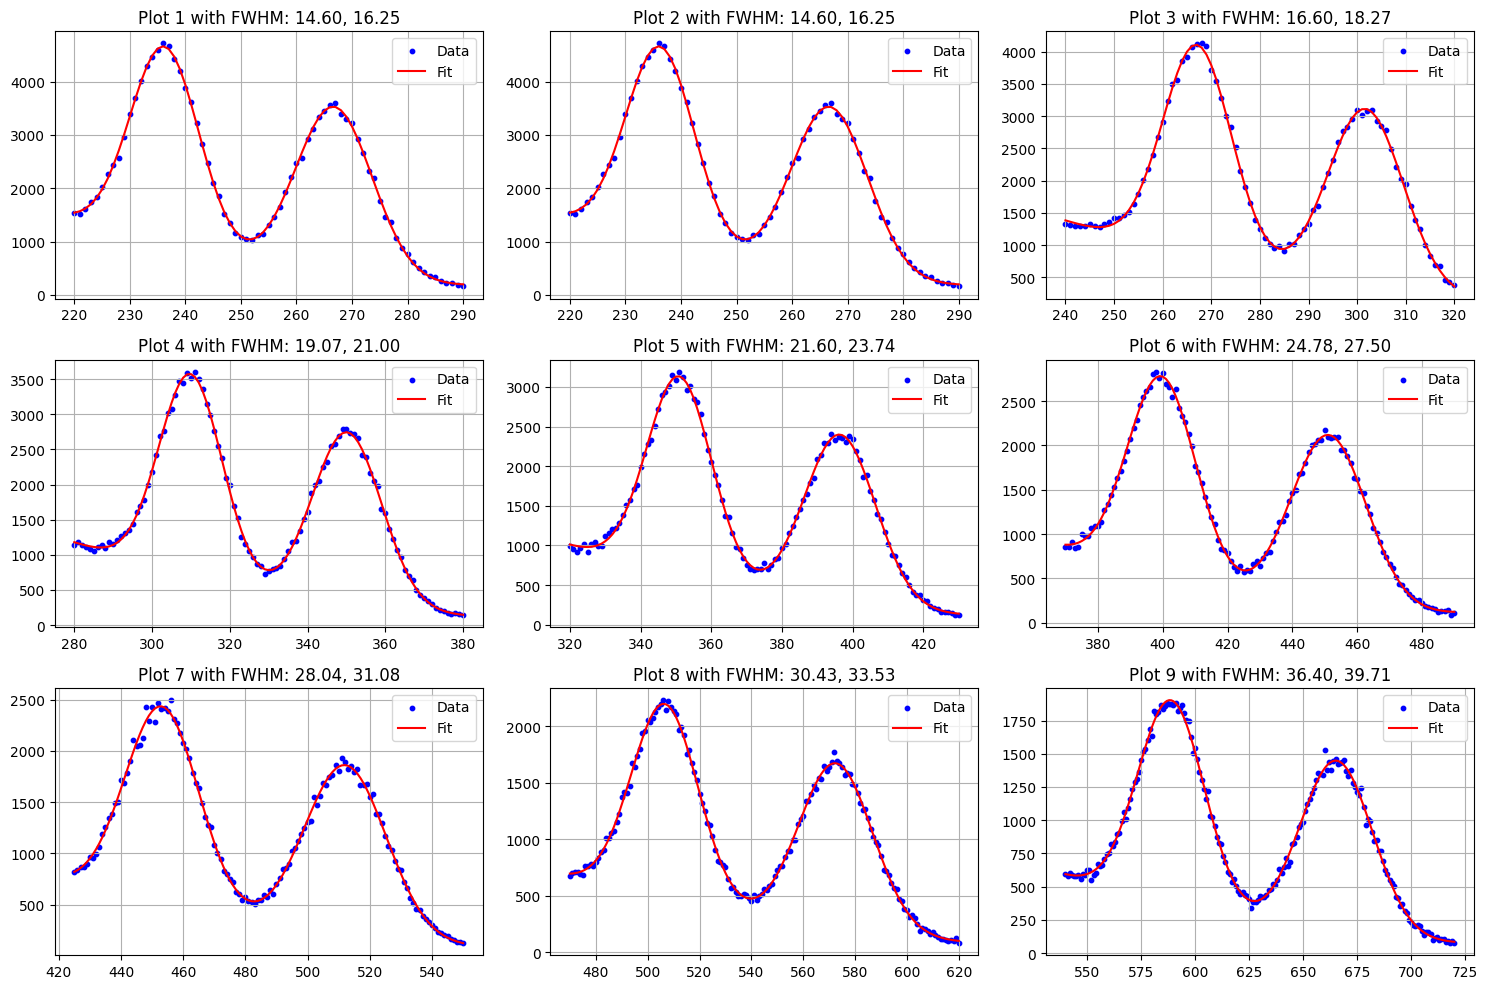

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def read_asc(file_path):
    data = np.loadtxt(file_path)
    return data


def double_gaussian_quad(x, A1, mu1, sigma1, A2, mu2, sigma2, a, b, c):
    gauss1 = A1 * np.exp(-(x - mu1) ** 2 / (2 * sigma1 ** 2))
    gauss2 = A2 * np.exp(-(x - mu2) ** 2 / (2 * sigma2 ** 2))
    quad = a * x ** 2 + b * x + c
    return gauss1 + gauss2 + quad


def fwhm(sigma):
    return 2 * np.sqrt(2 * np.log(2)) * sigma

asc_files = ['file1.asc', 'file2.asc', 'file3.asc', 'file4.asc', 'file5.asc',
             'file7.asc', 'file8.asc', 'file9.asc', 'file10.asc']


x_ranges = [
    (220, 290), (220, 290), (240, 320), (280, 380), (320, 430),
    (370, 490), (425, 550), (470, 620), (540, 720)
]


fig, axes = plt.subplots(3, 3, figsize=(15, 10))


for i, ax in enumerate(axes.flatten()):
    data = read_asc(asc_files[i])


    if data.size == 0:
        print(f"Warning: {asc_files[i]} has no data.")
        continue


    x = data[:, 0]
    y = data[:, 1]


    x_min, x_max = x_ranges[i]
    mask = (x >= x_min) & (x <= x_max)
    x_filtered = x[mask]
    y_filtered = y[mask]


    A1_init = np.max(y_filtered)
    A2_init = np.max(y_filtered) / 5
    mu1_init = np.mean(x_filtered) - (np.std(x_filtered) / 2)
    mu2_init = np.mean(x_filtered) + (np.std(x_filtered) / 2)
    sigma_init = 10
    initial_guess = [A1_init, mu1_init, sigma_init, A2_init, mu2_init, sigma_init, 0, 0, 0]

    # Perform curve fitting
    try:
        # Use bounds to prevent negative values for A1, A2, sigma1, and sigma2
        bounds = (
            [0, x_min, 0, 0, x_min, 0, -np.inf, -np.inf, -np.inf],  # Lower bounds
            [np.inf, x_max, np.inf, np.inf, x_max, np.inf, np.inf, np.inf, np.inf]  # Upper bounds
        )

        popt, _ = curve_fit(double_gaussian_quad, x_filtered, y_filtered, p0=initial_guess, bounds=bounds)

        # Get the fitted parameters
        A1, mu1, sigma1, A2, mu2, sigma2, a, b, c = popt

        # Calculate FWHM for both peaks
        fwhm1 = fwhm(sigma1)
        fwhm2 = fwhm(sigma2)

        # Print FWHM values for both peaks
        print(f"Plot {i+1}:")
        print(f"  FWHM for peak 1 (mu1={mu1}, sigma1={sigma1}): {fwhm1:.2f}")
        print(f"  FWHM for peak 2 (mu2={mu2}, sigma2={sigma2}): {fwhm2:.2f}")

        # Plot the original data and the fitted curve
        ax.scatter(x_filtered, y_filtered, c='blue', s=10, label="Data")
        ax.plot(x_filtered, double_gaussian_quad(x_filtered, *popt), 'r-', label="Fit")

        # Add title and legend
        ax.set_title(f'Plot {i+1} with FWHM: {fwhm1:.2f}, {fwhm2:.2f}')
        ax.legend()
        ax.grid(True)

    except RuntimeError:
        print(f"Warning: Fit failed for Plot {i+1}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def read_asc(file_path):
    data = np.loadtxt(file_path)
    return data


def double_gaussian_quad(x, A1, mu1, sigma1, A2, mu2, sigma2, a, b, c):
    gauss1 = A1 * np.exp(-(x - mu1) ** 2 / (2 * sigma1 ** 2))
    gauss2 = A2 * np.exp(-(x - mu2) ** 2 / (2 * sigma2 ** 2))
    quad = a * x ** 2 + b * x + c
    return gauss1 + gauss2 + quad


def fwhm(sigma):
    return 2 * np.sqrt(2 * np.log(2)) * sigma

# List of .asc files and corresponding x-range for each plot
asc_files = ['file1.asc', 'file2.asc', 'file3.asc', 'file4.asc', 'file5.asc',
             'file7.asc', 'file8.asc', 'file9.asc', 'file10.asc']

x_ranges = [
    (220, 290), (220, 290), (240, 320), (280, 380), (320, 440),
    (370, 500), (425, 550), (470, 620), (540, 720)
]

# Initialize arrays to store FWHM, centroid values, and resolutions for each plot
fwhm_centroid_values = []
resolution_values = []

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Loop through each file and corresponding axes
for i, ax in enumerate(axes.flatten()):
    data = read_asc(asc_files[i])

    if data.size == 0:
        print(f"Warning: {asc_files[i]} has no data.")
        continue

    x = data[:, 0]
    y = data[:, 1]

    x_min, x_max = x_ranges[i]
    mask = (x >= x_min) & (x <= x_max)
    x_filtered = x[mask]
    y_filtered = y[mask]

    # Initial guess for the parameters
    A1_init = np.max(y_filtered)
    A2_init = np.max(y_filtered) / 4
    mu1_init = np.mean(x_filtered) - (np.std(x_filtered) / 2)
    mu2_init = np.mean(x_filtered) + (np.std(x_filtered) / 2)
    sigma_init = 10
    initial_guess = [A1_init, mu1_init, sigma_init, A2_init, mu2_init, sigma_init, 0, 0, 0]

    # Perform curve fitting
    try:
        # Use bounds to prevent negative values for A1, A2, sigma1, and sigma2
        bounds = (
            [0, x_min, 0, 0, x_min, 0, -np.inf, -np.inf, -np.inf],  # Lower bounds
            [np.inf, x_max, np.inf, np.inf, x_max, np.inf, np.inf, np.inf, np.inf]  # Upper bounds
        )

        popt, _ = curve_fit(double_gaussian_quad, x_filtered, y_filtered, p0=initial_guess, bounds=bounds)

        # Get the fitted parameters
        A1, mu1, sigma1, A2, mu2, sigma2, a, b, c = popt

        # Calculate FWHM for both peaks
        fwhm1 = fwhm(sigma1)
        fwhm2 = fwhm(sigma2)

        # Calculate Resolution for both peaks
        resolution1 = fwhm1 / mu1 if mu1 != 0 else np.nan  # Avoid division by zero
        resolution2 = fwhm2 / mu2 if mu2 != 0 else np.nan  # Avoid division by zero

        # Print FWHM and resolution values for both peaks
        print(f"Plot {i+1}:")
        print(f"  FWHM for peak 1 (mu1={mu1}, sigma1={sigma1}): {fwhm1:.2f}, Resolution: {resolution1:.2f}")
        print(f"  FWHM for peak 2 (mu2={mu2}, sigma2={sigma2}): {fwhm2:.2f}, Resolution: {resolution2:.2f}")

        # Append FWHM, centroid, and resolution values for both peaks to the array
        fwhm_centroid_values.append([fwhm1, mu1, fwhm2, mu2])
        resolution_values.append([resolution1, resolution2])

        # Plot the original data and the fitted curve
        ax.scatter(x_filtered, y_filtered, c='blue', s=10, label="Data")
        ax.plot(x_filtered, double_gaussian_quad(x_filtered, *popt), 'r-', label="Fit")

        # Add title and legend
        ax.set_title(f'Voltage: {15*i+630} V')
        ax.legend()
        ax.grid(True)

    except RuntimeError:
        print(f"Warning: Fit failed for Plot {i+1}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Convert the list of values into a 2D numpy array
fwhm_centroid_array = np.array(fwhm_centroid_values)
resolution_array = np.array(resolution_values)

# Print the resulting 2D arrays
print("2D Array of FWHM and Centroid values for each plot:")
print(fwhm_centroid_array)

print("2D Array of Resolution values for each plot:")
print(resolution_array)


Plot 1:
  FWHM for peak 1 (mu1=236.2429058343079, sigma1=6.1985031819515335): 14.60, Resolution: 0.06
  FWHM for peak 2 (mu2=266.7423426346904, sigma2=6.902571789697112): 16.25, Resolution: 0.06
Plot 2:
  FWHM for peak 1 (mu1=236.2429058343079, sigma1=6.1985031819515335): 14.60, Resolution: 0.06
  FWHM for peak 2 (mu2=266.7423426346904, sigma2=6.902571789697112): 16.25, Resolution: 0.06
Plot 3:
  FWHM for peak 1 (mu1=267.102811837488, sigma1=7.048159345882073): 16.60, Resolution: 0.06
  FWHM for peak 2 (mu2=301.76200040064, sigma2=7.757691020810497): 18.27, Resolution: 0.06
Plot 4:
  FWHM for peak 1 (mu1=309.9095457727507, sigma1=8.099852305589504): 19.07, Resolution: 0.06
  FWHM for peak 2 (mu2=350.1733318506703, sigma2=8.916115132051916): 21.00, Resolution: 0.06
Plot 5:
  FWHM for peak 1 (mu1=350.9459391702868, sigma1=9.126543406676637): 21.49, Resolution: 0.06
  FWHM for peak 2 (mu2=396.5004409252161, sigma2=10.051853197797534): 23.67, Resolution: 0.06
Plot 6:
  FWHM for peak 1 (mu1

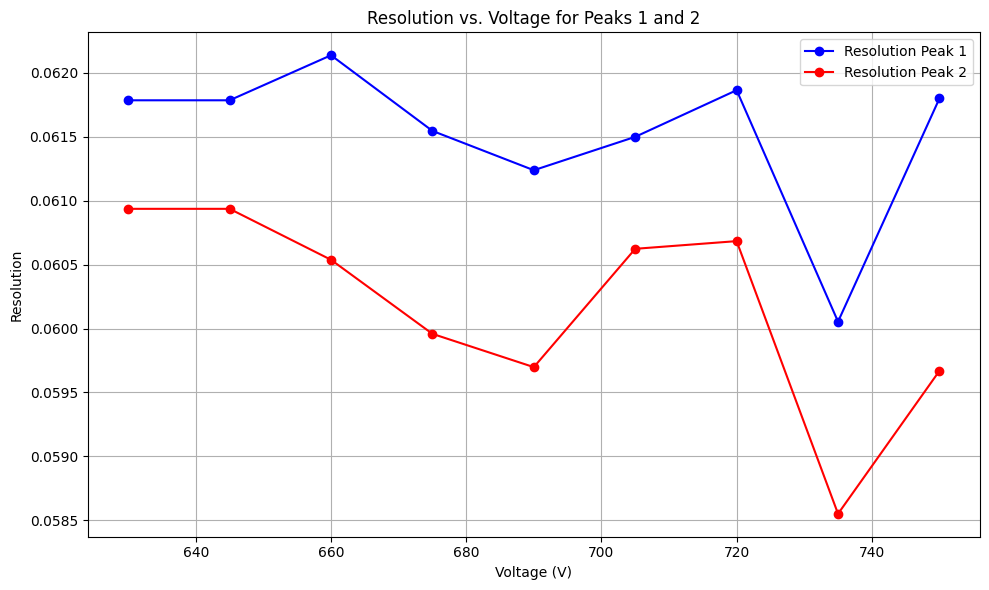

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Corrected resolution array with resolution values for each plot
resolution_array = np.array([
    [0.06178539, 0.06093639],
    [0.06178539, 0.06093639],
    [0.06213767, 0.06053766],
    [0.06154601, 0.05995844],
    [0.0612384 , 0.05969806],
    [0.06149949, 0.06062365],
    [0.06186447, 0.06068372],
    [0.06005386, 0.05855081],
    [0.06179972, 0.05966897]
])

# Define the x-range for plotting (from 630 to 750)
x_vals = np.linspace(630, 750, resolution_array.shape[0])

# Plot the resolution values for both peaks
plt.figure(figsize=(10, 6))

# Plot resolution values for peak 1 (first column)
plt.plot(x_vals, resolution_array[:, 0], label="Resolution Peak 1", color='b', marker='o')

# Plot resolution values for peak 2 (second column)
plt.plot(x_vals, resolution_array[:, 1], label="Resolution Peak 2", color='r', marker='o')

# Add labels, title, and legend
plt.xlabel('Voltage (V)')
plt.ylabel('Resolution')
plt.title('Resolution vs. Voltage for Peaks 1 and 2')
plt.legend()

# Display grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
